# Calculation of random gaussian noise coincident events
   Here results are presented in cells
    

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
%matplotlib inline

#make input random noise of the same size as the real data

#impliment random noise
#a random number array is generated with floats between 0 and 1 for each position of the time series

#real data std from sig 1 resonant slice
sig1_std = 1.4350974259598446
#use first 4M lines for computer performance
noise = np.random.normal(size=4000000, scale=sig1_std)

#time step (seconds)
dt = 0.01

# sig_1 = X1+iY1
sig_1 = noise

### Spectrogram

(76, 181812)

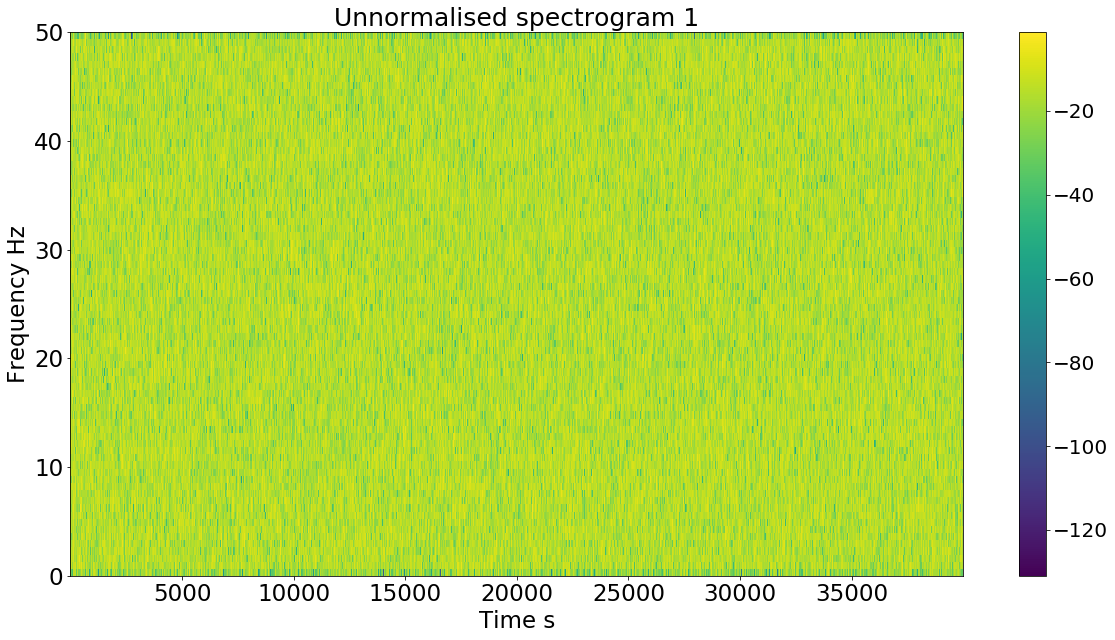

In [42]:
#SIGNAL 1
plt.figure(figsize=(20,10))

spectrum1, freqs1, t_bins1, im1 = plt.specgram(x=sig_1, Fs=1/dt, NFFT = 150)

plt.ylabel("Frequency Hz",fontsize=23)
plt.xlabel("Time s",fontsize=23)
cbar = plt.colorbar(im1);
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
cbar.ax.tick_params(labelsize=20)
plt.title('Unnormalised spectrogram 1',fontsize=25)

np.shape(spectrum1)

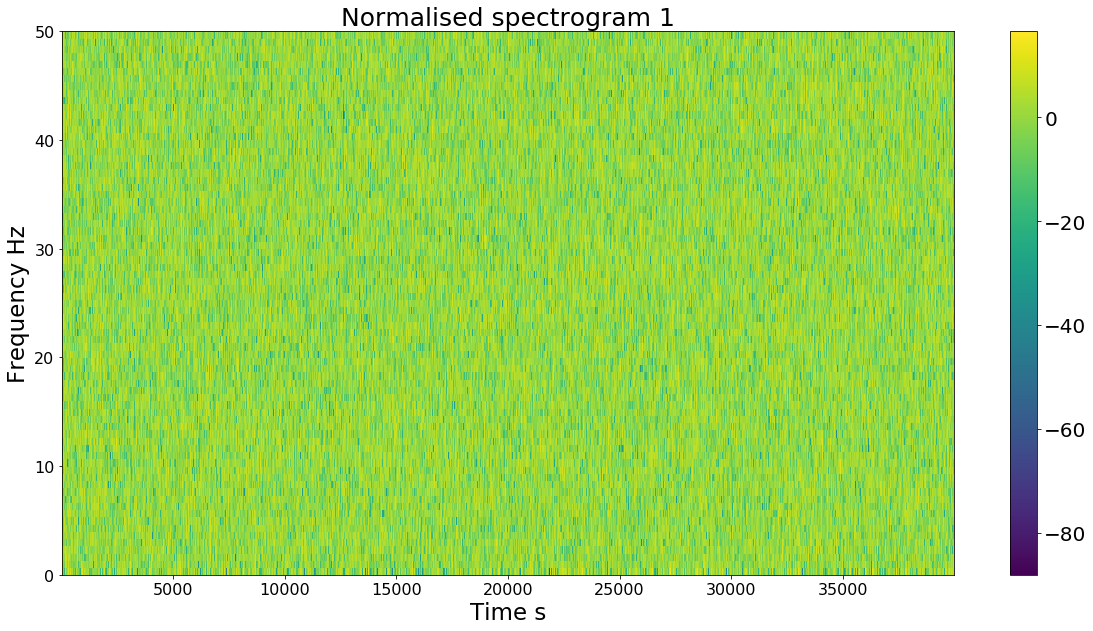

In [43]:
#SIGNAL 1

#normalise spectrum powers
#Median normalisation across individual frequencies
norm_spectrum1 = np.ones(np.shape(spectrum1))
for row in range(len(spectrum1)):
    median_row =  np.median(spectrum1[row])
    norm_spectrum1[row] = spectrum1[row]/median_row

    #plotting spectrogram with normalised powers
plt.figure(figsize=(20,10))
plt.pcolormesh(t_bins1, freqs1, 10 * np.log10(norm_spectrum1))

plt.ylabel("Frequency Hz",fontsize=23)
plt.xlabel("Time s",fontsize=23)
cbar = plt.colorbar();
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Normalised spectrogram 1',fontsize=25)


cbar.ax.tick_params(labelsize=20)

In [44]:
np.max(spectrum1)

0.7572729273200718

### Frequency Slicing

In [45]:
#Frequency slicing
#need to take frequencies in the resonant mode roughly 2-4Hz and one ouside this range eg. 30-40Hz

def freq_slice(min_freq, max_freq, freqs, t_bins, norm_spectrum,title):
    '''function slices the array containing the frequency spectrum using the min and max boundaries,
    and the corresponding spectrum powers. It plots the slices specgram and returns slice spectrum.'''
    
    #find the elements in the array in the HZ range
    slice_freqs = freqs[(min_freq<freqs) & (freqs<max_freq)]
    #and their indicies
    slice_indices = np.where((min_freq<freqs) & (freqs<max_freq))

    #need the spectrum powers corresponding to these freqs
    slice_spectrum = norm_spectrum[slice_indices]
    #res_mode_tbins = t_bins[res_mode_indices]
    
    #This doesn't really need plotted
    
    #now plot the spectrogram for this range
    plt.pcolormesh(t_bins, slice_freqs, 10 * np.log10(slice_spectrum))
    
    
    plt.ylabel("Frequency Hz",fontsize=23)
    plt.xlabel("Time s",fontsize=23)
    cbar = plt.colorbar();
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    cbar.ax.tick_params(labelsize=20)
    plt.title(title)
    
    return slice_spectrum, slice_freqs


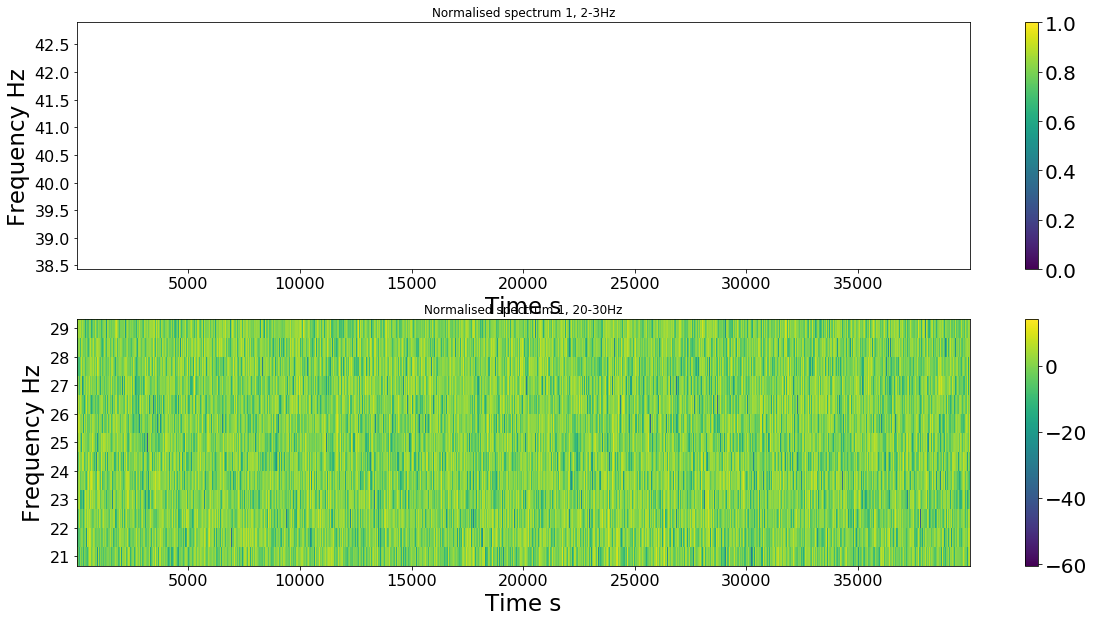

In [46]:
#SIGNAL 1

plt.figure(figsize=(20,10))
#Call function for resonant mode slice
plt.subplot(211)
res_slice1 = freq_slice(40,41, freqs=freqs1, t_bins=t_bins1, norm_spectrum=norm_spectrum1,title = 'Normalised spectrum 1, 2-3Hz')
res_slice_spec1 = res_slice1[0]
res_slice_freqs1 = res_slice1[1]



#Call function for background
plt.subplot(212)
bkgd_slice1 = freq_slice(20,30, freqs=freqs1, t_bins=t_bins1, norm_spectrum=norm_spectrum1,title='Normalised spectrum 1, 20-30Hz')
bkgd_slice_spec1 = bkgd_slice1[0]
bkgd_slice_freqs1 = bkgd_slice1[1]

### Thresholding


/Users/niallgray/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


Text(0.5, 1.0, 'peaks signal 1')

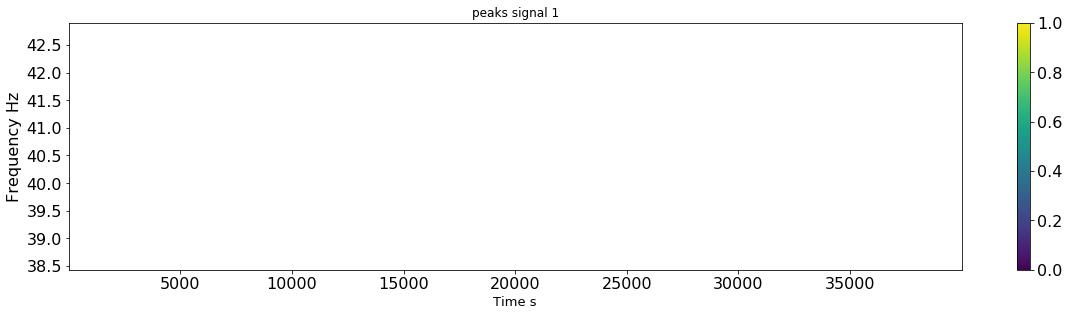

In [47]:
#look at undifferenced signal above 10
threshold = 7

    
plt.figure(figsize=(20,10))


#SIGNAL 1
res_slice_spec_thresh1 = np.copy(res_slice_spec1)
res_slice_spec_thresh1[res_slice_spec_thresh1<threshold] = 0



# #plot###
plt.subplot(212)
plt.pcolormesh(t_bins1, res_slice_freqs1 ,  10 * np.log10(res_slice_spec_thresh1))
plt.ylabel("Frequency Hz",fontsize=16)
plt.xlabel("Time s",fontsize=13)
cbar = plt.colorbar();
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar.ax.tick_params(labelsize=16)
plt.title('peaks signal 1')
####


In [48]:
len(t_bins1)//2

90906

#### Signal 0 is quite noisy in the last 10k seconds so instead we can look at signal 1 as two separate signals by splitting it in two and pretending the two halfs are over the same time period but from different detectors

/Users/niallgray/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/niallgray/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 1.0, 'Signal 1b (2nd half) thresholded between 2-3Hz')

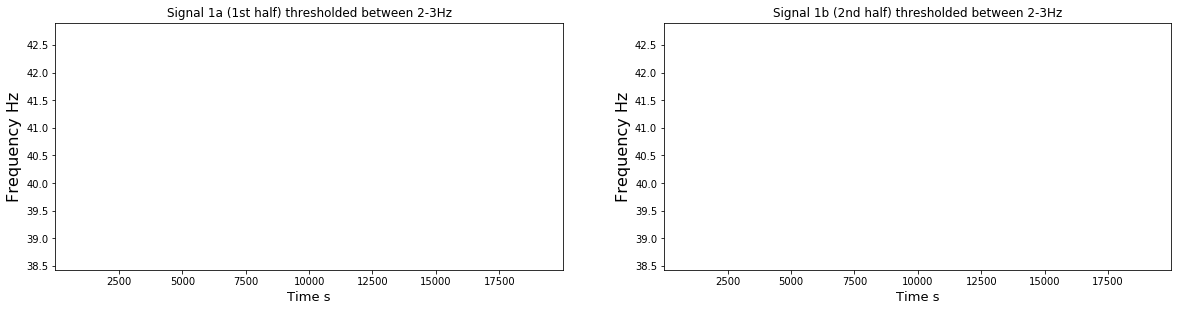

In [49]:
#need to split sig 1 into two sets
sig1a_thresh = np.copy(res_slice_spec_thresh1[:,:(len(t_bins1)//2)])
sig1b_thresh = np.copy(res_slice_spec_thresh1[:,(len(t_bins1)//2):])

#also split bins accordingly
t_bins1a = np.copy(t_bins1[:(len(t_bins1)//2)])

#change time stamps on second half of signal to immitate the first
t_bins1b = np.copy(t_bins1a)

#frequencies are the same as for the whole spectrum

plt.figure(figsize=(20,10))


plt.subplot(221)
plt.pcolormesh(t_bins1a,res_slice_freqs1,  10 * np.log10(sig1a_thresh))
plt.ylabel("Frequency Hz",fontsize=16)
plt.xlabel("Time s",fontsize=13)
plt.title("Signal 1a (1st half) thresholded between 2-3Hz")

plt.subplot(222)
plt.pcolormesh(t_bins1b,res_slice_freqs1,  10 * np.log10(sig1b_thresh))
plt.ylabel("Frequency Hz",fontsize=16)
plt.xlabel("Time s",fontsize=13)
plt.title("Signal 1b (2nd half) thresholded between 2-3Hz")

### Detector coincidence

In [50]:
#Record time at which each event occurs

def peaktimes(spectrum, times):
    #find column indicies of pixels which are larger than 0
    peakLocation_column = np.where(spectrum > 0)[1]
    
    #remove duplicates(where more than one frequency is involved) and sort
    peakLocation_column = list(set(peakLocation_column))
    peakLocation_column = np.sort(peakLocation_column)
    


    #Now match these indicies with the correspondng times from t_bins
    peak_times = times[peakLocation_column]
    
    return peak_times


#### coincidence between signal 1a and 1b

In [51]:
abs_tolerance = 4.99
#peak times of the divided spectrum of signal 1 to mimic two detectors
peaktimes1a = peaktimes(sig1a_thresh,t_bins1a)
peaktimes1b = peaktimes(sig1b_thresh,t_bins1a)

#non-time shifted coincidence
atol_coinc_1ab = {i for i in peaktimes1a if np.isclose(peaktimes1b, i, atol=abs_tolerance).any()}
atol_coinc_1ab = np.sort(list(atol_coinc_1ab))
#total coincidences
no_coinc_1ab = len(atol_coinc_1ab)
print("total coincidences, non-time shifted, signal 1a and signal 1b: ", no_coinc_1ab)

total coincidences, non-time shifted, signal 1a and signal 1b:  152


### Background coincidence - using time shift
#### The uneven noise in signal 0 skews the coincidence between signal 0 and signal 1

In [52]:
#Time shifts -hold one signal and add dt seconds to the other a number of times
#average bkgd coincidence is average coincidence across all the shifts

def timeshift_coincidence(sigA, sigB, time_step, abs_tolerance):
    #want to count total coincidences
    coinc_count = []

    for t in range(-100,101):
        t_shift = time_step * t
        sigA_tshift = np.copy(sigA) + t_shift

        #coincidence
        atol_coinc_tshift = {i for i in sigA_tshift if np.isclose(sigB, i, atol=abs_tolerance).any()}
        #no. coincidences

        coinc_count.append(len(atol_coinc_tshift))
    return coinc_count
    

#### Background of signal 1a and 1b time shifted

(0, 250)

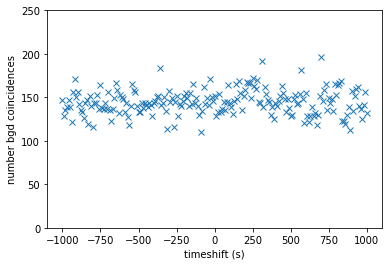

In [53]:
time_step = 10
bgd_coinc_1ab = timeshift_coincidence(peaktimes1a,peaktimes1b,time_step=time_step,abs_tolerance=abs_tolerance)

timeshifts = np.array(range(-100,101))*time_step

plt.plot(timeshifts,bgd_coinc_1ab,'x')
plt.ylabel('number bgd coincidences')
plt.xlabel('timeshift (s)')
plt.ylim([0,250])

In [54]:
#average bkgd coincidence is average coincidence across all the shifts

#don't want to count the unshifted count in the average background coincidences
bgd_coinc_1ab[100] = 0

#average number of background coincidences

ave_bgd_coinc = np.sum(bgd_coinc_1ab)/len(bgd_coinc_1ab)-1

In [55]:
print("Number of coincident peak times: ",no_coinc_1ab)
print("Average number of background coincidences: ",ave_bgd_coinc)


Number of coincident peak times:  152
Average number of background coincidences:  143.03980099502488


In [56]:
theorecticalAveCoinc = len(peaktimes1a)*len(peaktimes1b)*(abs_tolerance)*2/40000

In [57]:
theorecticalAveCoinc

136.050354

In [58]:
ave_bgd_coinc/theorecticalAveCoinc


1.0513739713975672

## Cross-correlation

In [59]:
#find the correlation between two detector windows
#need to split the spectrogram in half again (this time before the thresholding)

sig1a_spec = np.copy(res_slice_spec1[:,:(len(t_bins1)//2)])
sig1b_spec = np.copy(res_slice_spec1[:,(len(t_bins1)//2):])
#t bins are the same as with the coincidence bit above

# use  stats.pearsonr(sig1,sig2)

#There is only 1 freq bin so just use row 0
crosscor_noise = stats.pearsonr(sig1a_spec[0],sig1b_spec[0])
crosscor_noise

(0.00013419305646939373, 0.9677268069184125)

(array([6.5879e+04, 1.8116e+04, 4.9630e+03, 1.4040e+03, 3.7700e+02,
        1.1800e+02, 3.6000e+01, 1.0000e+01, 2.0000e+00, 1.0000e+00]),
 array([2.47278830e-05, 1.85088546e+00, 3.70174619e+00, 5.55260693e+00,
        7.40346766e+00, 9.25432839e+00, 1.11051891e+01, 1.29560499e+01,
        1.48069106e+01, 1.66577713e+01, 1.85086321e+01]),
 <a list of 10 Patch objects>)

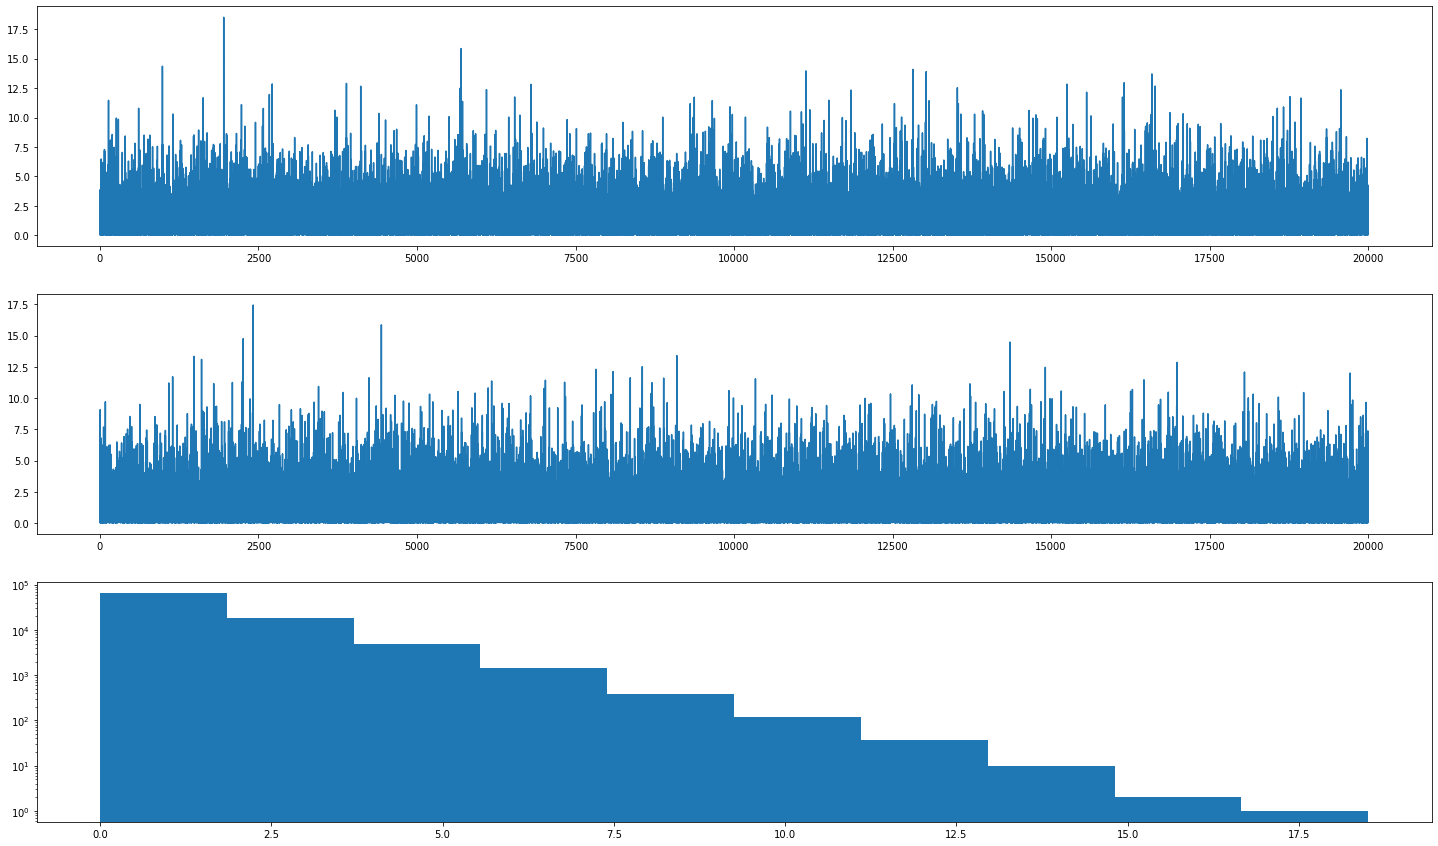

In [60]:
plt.figure(figsize=(25,15))

plt.subplot(311)
plt.plot(t_bins1a, sig1a_spec[0])

plt.subplot(312)
plt.plot(t_bins1a, sig1b_spec[0])

plt.subplot(313)
plt.hist(sig1a_spec[0], log='True')


## Random gaussian correlated signal

In [61]:
#add a random gaussian gw signal to the data

randGW = 10 * np.random.random(size=len(t_bins1a))

sig1a_randgw = sig1a_spec + randGW
sig1b_randgw = sig1b_spec + randGW

(array([1.0314e+04, 1.8250e+04, 1.9965e+04, 2.0259e+04, 1.6703e+04,
        4.2500e+03, 9.4100e+02, 1.8000e+02, 3.3000e+01, 1.1000e+01]),
 array([ 0.02954957,  2.27427331,  4.51899705,  6.76372079,  9.00844453,
        11.25316828, 13.49789202, 15.74261576, 17.9873395 , 20.23206324,
        22.47678698]),
 <a list of 10 Patch objects>)

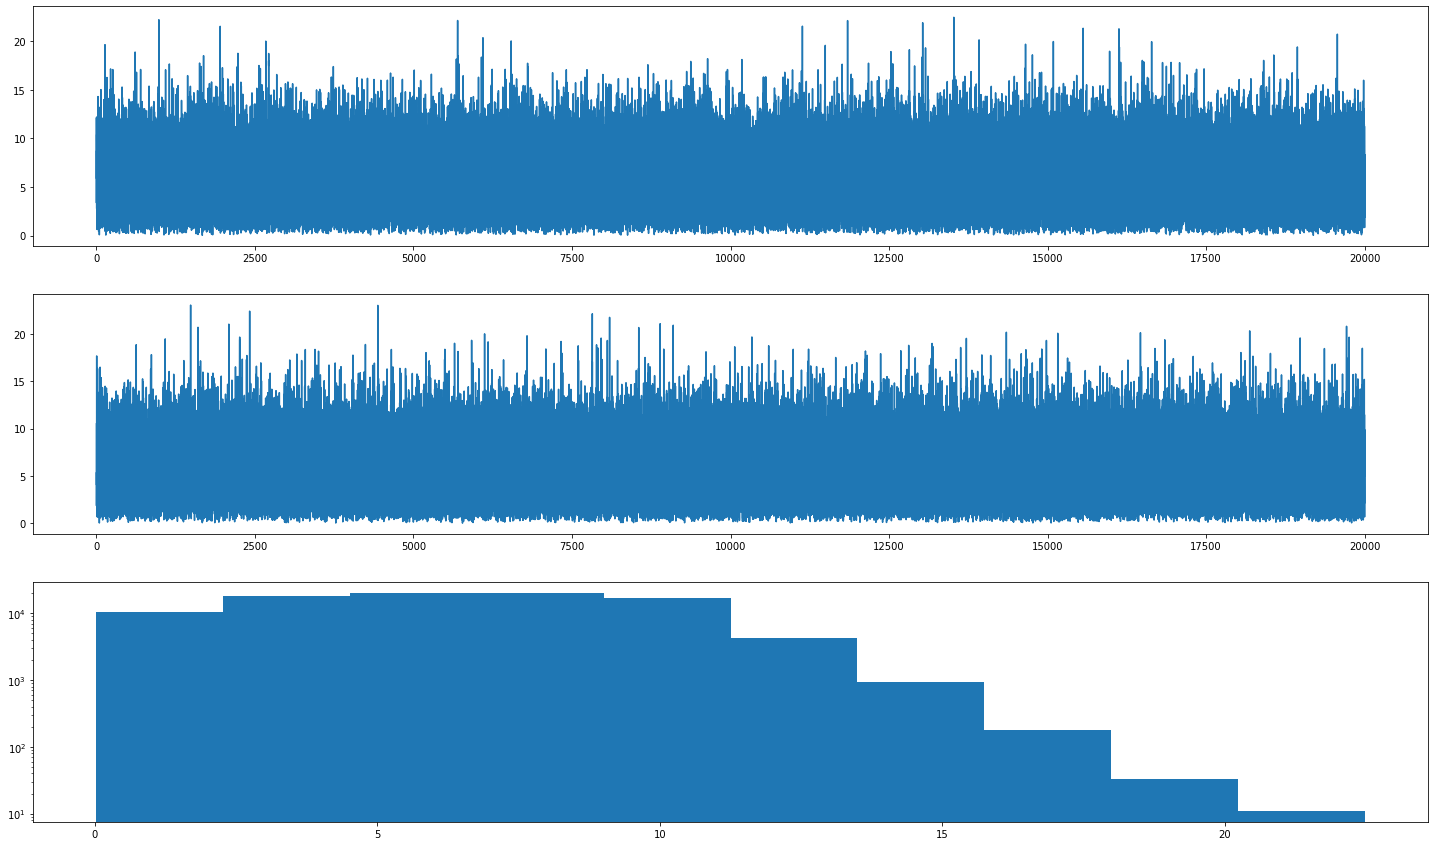

In [62]:
plt.figure(figsize=(25,15))

plt.subplot(311)
plt.plot(t_bins1a, sig1a_randgw[0])

plt.subplot(312)
plt.plot(t_bins1a, sig1b_randgw[0])

plt.subplot(313)
plt.hist(sig1a_randgw[0], log='True')


In [63]:
#pearsonr for the gauss noise streams with added randgw
cross_corr_randgw = stats.pearsonr(sig1a_randgw[0],sig1b_randgw[0])
cross_corr_randgw 
#ratio of pearson r with correlated signal to that without
cross_corr_randgw[0]/crosscor_noise[0]



5948.205657506968

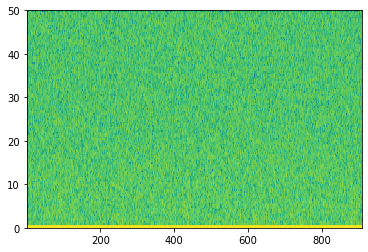

In [64]:
stocSpec = plt.specgram(x=(sig1a_randgw[0]), Fs=1/dt)

## Sinusoid correlated signal

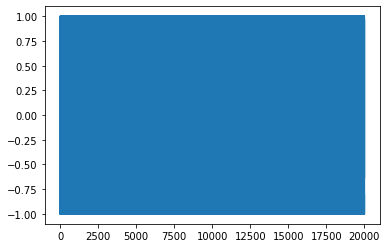

In [65]:
#add sinusoid signal to the data
sin1 = np.sin(2 * np.pi * 1 * t_bins1a)
plt.plot(t_bins1a,sin1)

sig1a_sin1 = sig1a_spec + 2*sin1
sig1b_sin1 = sig1b_spec + 2*sin1



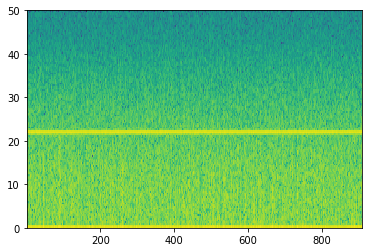

In [66]:
sinSpec = plt.specgram(x=(sig1a_sin1[0]), Fs=1/dt)

(array([2.8014e+04, 3.6961e+04, 2.0350e+04, 4.3460e+03, 9.8000e+02,
        1.8900e+02, 4.7000e+01, 1.6000e+01, 2.0000e+00, 1.0000e+00]),
 array([-1.99906535,  0.21350779,  2.42608093,  4.63865407,  6.85122721,
         9.06380035, 11.27637349, 13.48894663, 15.70151977, 17.9140929 ,
        20.12666604]),
 <a list of 10 Patch objects>)

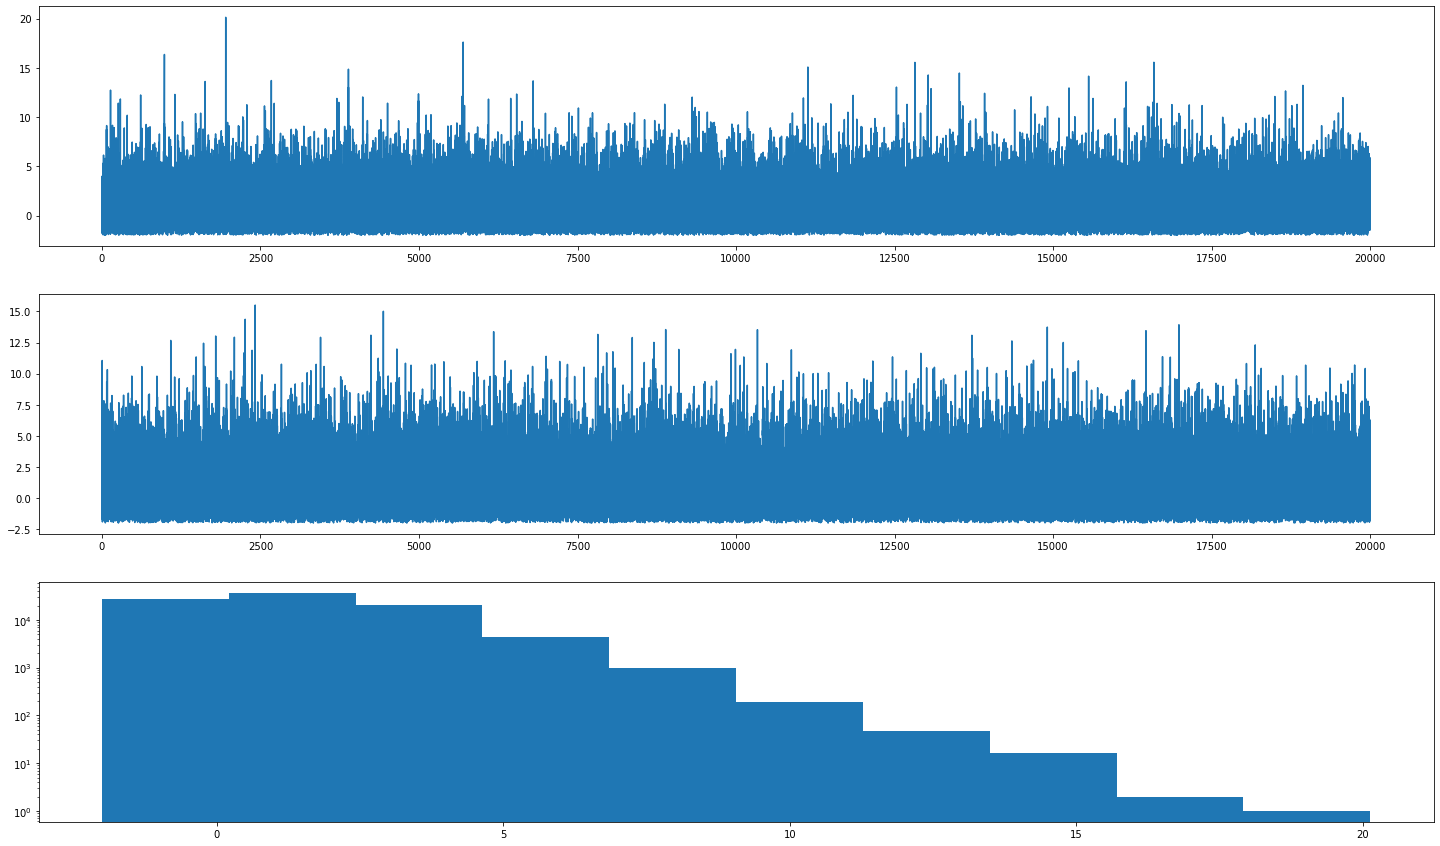

In [67]:
plt.figure(figsize=(25,15))

plt.subplot(311)
plt.plot(t_bins1a, sig1a_sin1[0])

plt.subplot(312)
plt.plot(t_bins1a, sig1b_sin1[0])

plt.subplot(313)
plt.hist(sig1a_sin1[0], log='True')



In [68]:
#pearsonr for the gauss noise streams with added sinusoid
cross_corr_singw = stats.pearsonr(sig1a_sin1[0],sig1b_sin1[0])
print(cross_corr_singw)
#ratio of pearson r with correlated signal to that without
cross_corr_singw[0]/crosscor_noise[0]


(0.4878625856949244, 0.0)


3635.5277875811285

## Sino-gaussian pulse correlated signal

(array([6.5865e+04, 1.8117e+04, 4.9670e+03, 1.4080e+03, 3.7900e+02,
        1.2100e+02, 3.6000e+01, 1.0000e+01, 2.0000e+00, 1.0000e+00]),
 array([2.47278830e-05, 1.85088546e+00, 3.70174619e+00, 5.55260693e+00,
        7.40346766e+00, 9.25432839e+00, 1.11051891e+01, 1.29560499e+01,
        1.48069106e+01, 1.66577713e+01, 1.85086321e+01]),
 <a list of 10 Patch objects>)

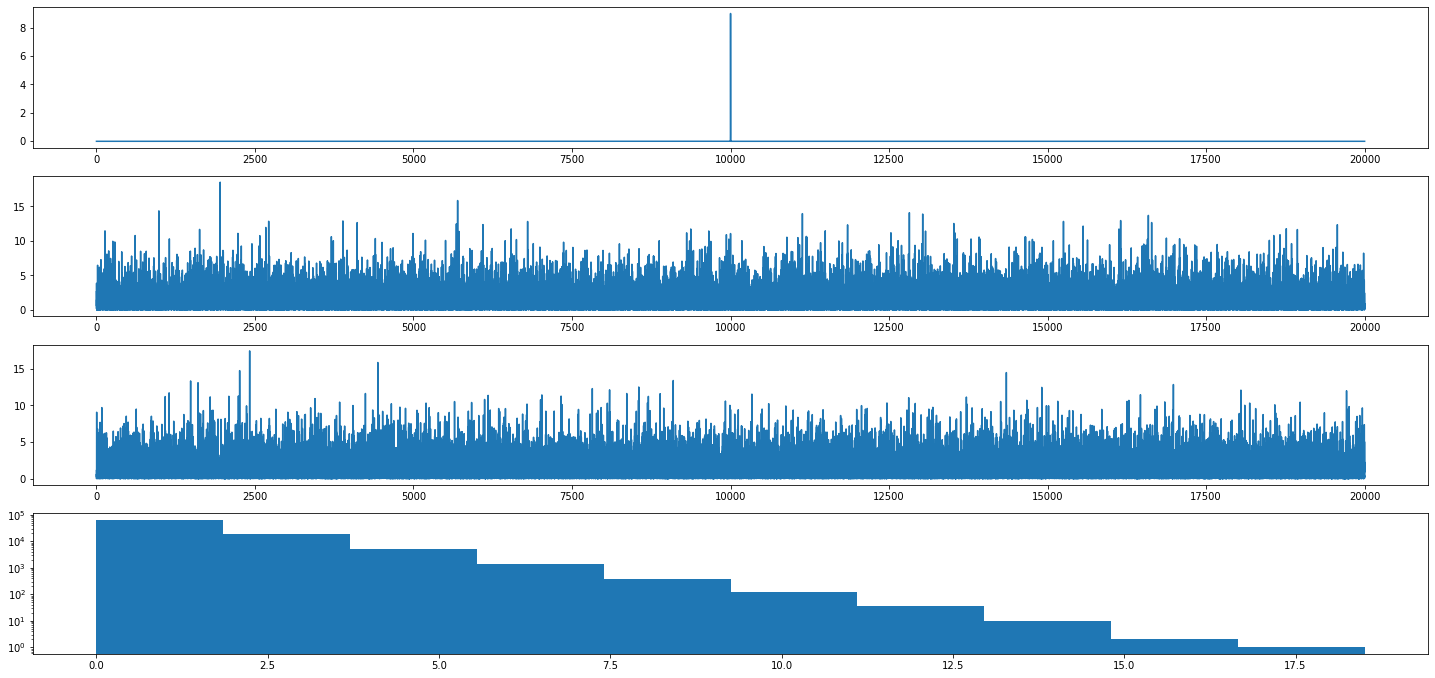

In [75]:
plt.figure(figsize=(25,15))

#Add a sino-gaussian pulse to the noise data
detect_singauss_sig = np.zeros(len(t_bins1a))


#make time series for gauss pulse
gauss_t = np.arange(-len(t_bins1a)/2, len(t_bins1a)/2)
sin_gauss_amp =9
gauss_sig = signal.gausspulse(gauss_t, fc=1, bw=0.1)
detect_singauss_sig = np.abs(np.copy(gauss_sig)) * sin_gauss_amp


#gauss_sig = gauss_sig + nse
plt.subplot(511)
plt.plot(t_bins1a,detect_singauss_sig)

#gauss_sin = axg2.specgram(gauss_sig,NFFT=2000, Fs=Fs)

#add the sino-gauss to the detector noise data
sig1a_sg = sig1a_spec[0] + detect_singauss_sig
sig1b_sg = sig1b_spec[0] + detect_singauss_sig


plt.subplot(512)
plt.plot(t_bins1a,sig1a_sg)
plt.subplot(513)
plt.plot(t_bins1a,sig1b_sg)
plt.subplot(514)
plt.hist(sig1a_sg, log='True')



(0.002482889189493024, 0.45409990490040464)


18.5023670733613

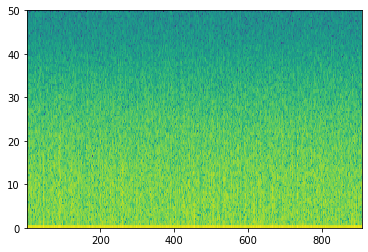

In [76]:
sgSpec = plt.specgram(x=(sig1a_sg), Fs=1/dt)

#pearsonr for the gauss noise streams with added sino-gaussian pulse
cross_corr_sggw = stats.pearsonr(sig1a_sg,sig1b_sg)
print(cross_corr_sggw)
cross_corr_sggw[0]/crosscor_noise[0]

## Cross-correlation stat technique - find window of time series with largest pearson r stat

In [77]:
#correlation windows (number of windows must be factor of length time bins -90906)
number_windows = 139
window_length = len(t_bins1a)/number_windows
#split the signals into windows 
sg_window_sig1a = np.split(sig1a_sg,number_windows)
sg_window_sig1b = np.split(sig1b_sg,number_windows)
#split corresponding time bins
sg_window_tbin = np.split(t_bins1a,number_windows)

#now compare each window to the those in the other stream by cross correlation
pearson_sg_window_ab = np.zeros((len(sg_window_sig1a),len(sg_window_sig1b)))

for a in range(len(sg_window_sig1a)):
    for b in range(len(sg_window_sig1b)):
        pearson_sg_window_ab[a,b] = stats.pearsonr(sg_window_sig1a[a], sg_window_sig1b[b])[0]

#find the index of the largest correlation stat window - should be the same in a and b
max_corr_location = (np.asarray(np.where(pearson_sg_window_ab == np.amax(pearson_sg_window_ab)))).ravel()

#find the corresponding time bin
max_corr_tbin = sg_window_tbin[max_corr_location[0]]
#print the edges of this bin
max_corr_tLims = max_corr_tbin[0], max_corr_tbin[-1]

print('max corr stat is ', pearson_sg_window_ab[max_corr_location,max_corr_location], ' in bin '
      ,max_corr_location, 'in the time region (s): ',max_corr_tLims )




max corr stat is  [0.27644041 0.27644041]  in bin  [69 69] in the time region (s):  (9928.47, 10072.13)
